In [76]:
import numpy as np

from copy import deepcopy
from tqdm import tqdm

from Mixers import * 

import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2)

---

In [84]:
dim = 100

time = 3000
step = 10

wait = 10 # ms

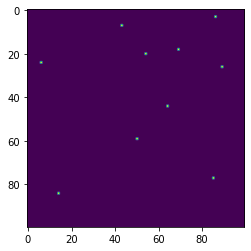

In [82]:
# initial distribution
di = np.zeros([dim,dim])
for _ in range(int(.1*dim)):
    di[np.random.randint(0,dim), np.random.randint(0,dim)] += 1

init = Distribution(di)

plt.imshow(init.dist)
plt.show()

In [95]:
transition_class = Random_Tensor

name = 'Random_Tensor'
folder_name = '{}_d{}_t{}_s{}'.format(name, dim, time, step)

!mkdir $folder_name

distribution = deepcopy(init)
transition = transition_class(dim)

plt.imshow(distribution.dist)
[plt.savefig(f'{folder_name}/{name}_{0:04}_{j}.png') for j in range(4)]

i = 0
for i in tqdm(np.arange(step,time,step), ncols=50):
    [distribution.update(transition) for _ in range(step)]

    plt.imshow(distribution.dist)
    plt.savefig(f'{folder_name}/{name}_{i:04}.png')

pics = f'{folder_name}/*.png'
gif = f'{folder_name}/{name}.gif'
!convert -delay 10 -loop 0 $pics $gif

---
---
---